<a href="https://colab.research.google.com/github/vaishnavishivde98/Hackathon/blob/main/Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Converting time stamp to UNIX time (in seconds)
import pandas as pd
import re
import os

# Load the CSV file
file_path = ['502_merged_data.csv','602_merged_data.csv','802_merged_data.csv']
# df = pd.read_csv(file_path)

# Function to remove day suffixes from datetime strings
def remove_suffix(date_str):
    return re.sub(r'(\d)(st|nd|rd|th)', r'\1', date_str)

for file in file_path:
    df = pd.read_csv(file)

    # Apply the function to the '@timestamp per 3 hours' column
    df['@timestamp per 3 hours'] = df['@timestamp per 3 hours'].apply(remove_suffix)

    # Convert the cleaned '@timestamp per 3 hours' column to datetime objects
    df['@timestamp per 3 hours'] = pd.to_datetime(df['@timestamp per 3 hours'], format='%B %d %Y, %H:%M:%S.%f')

    # Convert the datetime objects to POSIX time (Unix Epoch Time)
    df['posix_time'] = df['@timestamp per 3 hours'].apply(lambda x: x.timestamp())


    filename = file.split('.')[0]
    output_file_path = filename + '_with_posix.csv'
    df.to_csv(output_file_path, index=False)

In [4]:
import pandas as pd
from sklearn import linear_model #Importing linear model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

csv_data = ["502_merged_data_with_posix.csv", "602_merged_data_with_posix.csv","802_merged_data_with_posix.csv" ]

dataset = pd.concat((pd.read_csv(file) for file in csv_data))  #read the data from csv file
# dataset = dataset.drop(columns="Count")

#Rename columns
dataset.columns = [ 'Date_Time', 'Executor', 'Available_cpu', 'Garanteed_cpu', 'Used_cpu', 'Max_cpu','Timestamp' ]
dataset = dataset.drop(columns="Date_Time")
# dataset = dataset.drop(columns="Executor")

# Replacing comma "," to ""
dataset = dataset.replace(",",'',regex=True)
dataset = dataset.replace("Exec",'',regex=True)
dataset = dataset.astype(int)

# #Calculate the Available_cpu
dataset['Original_Avail_cpu'] = (dataset['Max_cpu'] - (dataset['Available_cpu'] + dataset['Used_cpu'])) + dataset['Available_cpu']
dataset

,Executor,Available_cpu,Garanteed_cpu,Used_cpu,Max_cpu,Timestamp,Original_Avail_cpu
0,502,484,320,736,1280,1680307200,544
1,502,528,320,556,1280,1680318000,724
2,502,772,320,292,1280,1680328800,988
3,502,1116,320,148,1280,1680339600,1132
4,502,988,320,76,1280,1680350400,1204
...,...,...,...,...,...,...,...
3614,802,1474,400,126,1600,1696064400,1474
3615,802,1466,400,134,1600,1696075200,1466
3616,802,1526,400,74,1600,1696086000,1526
3617,802,1554,400,46,1600,1696096800,1554


In [26]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
Index: 10624 entries, 0 to 3618
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Executor            10624 non-null  int64
 1   Available_cpu       10624 non-null  int64
 2   Garanteed_cpu       10624 non-null  int64
 3   Used_cpu            10624 non-null  int64
 4   Max_cpu             10624 non-null  int64
 5   Timestamp           10624 non-null  int64
 6   Original_Avail_cpu  10624 non-null  int64
dtypes: int64(7)
memory usage: 664.0 KB
None


In [5]:
len(dataset) #Length of dataset

10624

In [6]:
dataset.shape #Shape of dataset i.e 10881 rows × 6 columns

(10624, 7)

In [7]:
column_types=dataset.dtypes
print(column_types)

Executor              int64
Available_cpu         int64
Garanteed_cpu         int64
Used_cpu              int64
Max_cpu               int64
Timestamp             int64
Original_Avail_cpu    int64
dtype: object


In [8]:
# print(dataset.corr())

In [9]:
dataset.Executor.value_counts()
# print(3627+3619+3378) $10624

Executor
502    3627
802    3619
602    3378
Name: count, dtype: int64

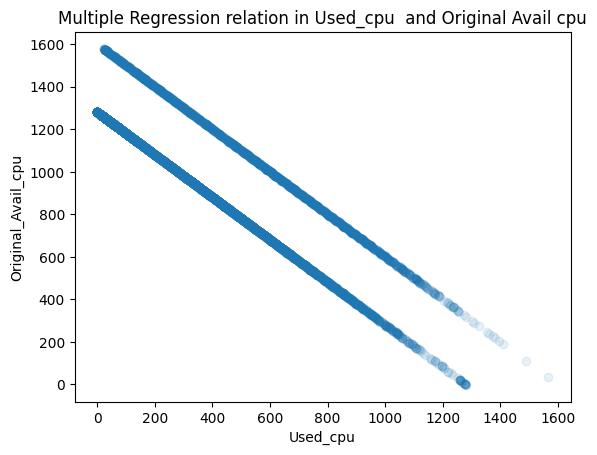

In [10]:
plt.scatter(dataset['Used_cpu'] , dataset['Original_Avail_cpu'],alpha=0.1)
plt.title('Multiple Regression relation in Used_cpu  and Original Avail cpu')
plt.xlabel('Used_cpu')
plt.ylabel('Original_Avail_cpu')
plt.show()

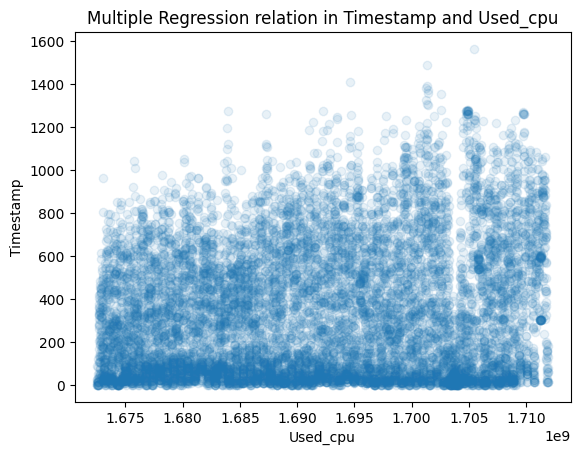

In [11]:
plt.scatter(dataset['Timestamp'] , dataset['Used_cpu'],alpha=0.1)
plt.title('Multiple Regression relation in Timestamp and Used_cpu')
plt.xlabel('Used_cpu')
plt.ylabel('Timestamp',)
plt.show()

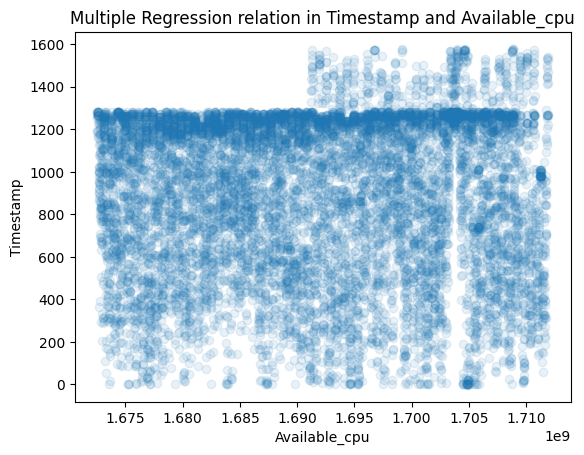

In [12]:
plt.scatter(dataset['Timestamp'] , dataset['Available_cpu'],alpha=0.1)
plt.title('Multiple Regression relation in Timestamp and Available_cpu')
plt.xlabel('Available_cpu')
plt.ylabel('Timestamp')
plt.show()

In [13]:
# plt.scatter(dataset['Timestamp'] , dataset['Garanteed_cpu'],alpha=0.5)
# plt.title('Multiple Regression relation in Timestamp and Garanteed_cpu')
# plt.xlabel('Garanteed_cpu')
# plt.ylabel('Timestamp')
# plt.show()

# plt.scatter(dataset['Timestamp'] , dataset['Max_cpu'],alpha=0.5)
# plt.title('Multiple Regression relation in Timestamp and Max_cpu')
# plt.xlabel('Max_cpu')
# plt.ylabel('Timestamp')
# plt.show()

# plt.scatter(dataset['Available_cpu'] , dataset['Max_cpu'],alpha=0.5)
# plt.title('Multiple Regression relation in Available_cpu and Max_cpu')
# plt.xlabel('Max_cpu')
# plt.ylabel('Available_cpu')
# plt.show()

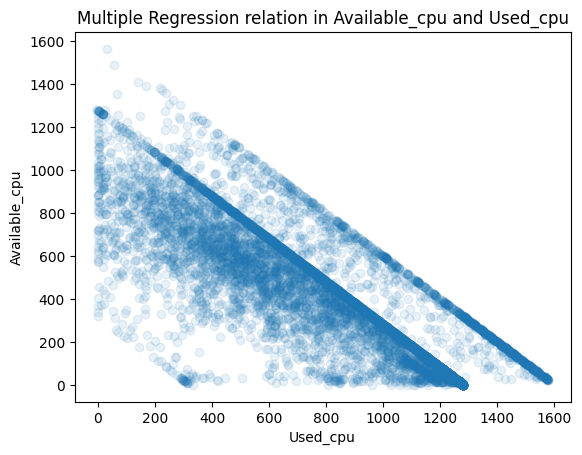

In [14]:
plt.scatter(dataset['Available_cpu'] , dataset['Used_cpu'],alpha=0.1)
plt.title('Multiple Regression relation in Available_cpu and Used_cpu')
plt.xlabel('Used_cpu')
plt.ylabel('Available_cpu')
plt.show()

In [15]:
dependent_variable = 'Used_cpu'
print(dependent_variable) # Used_cpu
print(type(dependent_variable)) #<class 'str'>

# dependent_variable = dataset['Used_cpu']
# dependent_variable
# print(type(dependent_variable))
# print(dependent_variable.shape)

Used_cpu
<class 'str'>


In [39]:
independent_variable = dataset.columns.tolist()
independent_variable.remove(dependent_variable)


elements_to_remove = ['Garanteed_cpu','Available_cpu','Original_Avail_cpu',"Executor"]
independent_variable_list = [x for x in independent_variable if x not in elements_to_remove]


# print(independent_variable) #['Timestamp', 'Executor', 'Available_cpu', 'Garanteed_cpu', 'Max_cpu']
# print(type(independent_variable)) #<class 'list'>
# print(elements_to_remove) #['Executor', 'Garanteed_cpu','Max_cpu']
print(independent_variable_list)

['Max_cpu', 'Timestamp']


In [40]:
X = dataset[independent_variable_list].values
print(type(X)) #<class 'numpy.ndarray'>
print(X.shape) #(10624, 5)
# print(X)

Y = dataset[dependent_variable].values
print(type(Y)) #<class 'numpy.ndarray'>
print(Y.shape) #(10624,)
# print(Y)

# print(X[0:10])
# print(Y[0:10])

<class 'numpy.ndarray'>
(10624, 2)
<class 'numpy.ndarray'>
(10624,)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [42]:
print("***********X_train************")
print("Type of X_train  ===> ",type(X_train))
print("Shape of X_train ===> ",X_train.shape)
print("***********X_train************")
print("")

print("***********X_test***********")
print("Type of X_test  ===> ",type(X_test))
print("Shape of X_test ===> ",X_test.shape)
print("***********X_test************")
print("")


print("***********Y_train************")
print("Type of Y_train  ===> ",type(Y_train))
print("Shape of Y_train ===> ",Y_train.shape)
print("***********Y_train************")
print("")

print("***********Y_test***********")
print("Type of Y_test  ===> ",type(Y_test))
print("Shape of Y_test ===> ",Y_test.shape)

print("***********Y_test***********")

print("")
print(X_train[0:10])
print(Y_train[0:10])


print(X_test[0:10])
print(Y_test[0:10])

***********X_train************
Type of X_train  ===>  <class 'numpy.ndarray'>
Shape of X_train ===>  (8499, 2)
***********X_train************

***********X_test***********
Type of X_test  ===>  <class 'numpy.ndarray'>
Shape of X_test ===>  (2125, 2)
***********X_test************

***********Y_train************
Type of Y_train  ===>  <class 'numpy.ndarray'>
Shape of Y_train ===>  (8499,)
***********Y_train************

***********Y_test***********
Type of Y_test  ===>  <class 'numpy.ndarray'>
Shape of Y_test ===>  (2125,)
***********Y_test***********

[[      1280 1699758000]
 [      1600 1695535200]
 [      1280 1703419200]
 [      1280 1677315600]
 [      1280 1675566000]
 [      1280 1686711600]
 [      1600 1710298800]
 [      1280 1688569200]
 [      1600 1705503600]
 [      1280 1701712800]]
[188 478  12 166  44 428 658 328 890 692]
[[      1280 1682121600]
 [      1280 1681938000]
 [      1280 1701518400]
 [      1280 1685426400]
 [      1280 1688882400]
 [      1280 1706680800]


In [20]:
# from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler class
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [43]:
regression = LinearRegression()
regression.fit(X_train, Y_train) # Train the model


LinearRegression()

In [44]:
y_pred = regression.predict(X_test)
# math.sqrt(mean_squared_error(y_test, y_pred))
print(y_pred[0:10])
print(type(y_pred))
# print(y_pred.head())

[294.80158027 294.56290192 320.01724547 299.09779048 303.59055934
 326.72831894 297.66572041 314.34512479 554.74109773 313.17981286]
<class 'numpy.ndarray'>


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediction new values
predictions = regression.predict(X_test)
r2 = r2_score(Y_test, predictions) #R squared
rmse = mean_squared_error(Y_test, predictions, squared=False) #Root mean squared error (RMSE)

print(r2)
print(rmse)

0.11734142316833562
287.87033897802473


In [49]:
# Printing coefficients and intercept
coefficients = regression.coef_
intercept = regression.intercept_

# Writing a function to predict charges

# #['Executor', 'Max_cpu', 'Timestamp']
# def calculate_used_cpu(Executor, Max_cpu, Timestamp):
#   return (Executor * coefficients[0]) + (Max_cpu * coefficients[1]) + (Timestamp * coefficients[2]) + intercept

#['Max_cpu', 'Timestamp']
def calculate_used_cpu(Max_cpu, Timestamp):
  return (Max_cpu * coefficients[0]) + (Timestamp * coefficients[1]) + intercept

# Predicting used_cpu
print(calculate_used_cpu(1280, 1688569200)) # 602 1280 1696258800



303.1834021617274


In [25]:
# # Creating a pairwise plot in Seaborn
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.pairplot(dataset)
# plt.show()

In [36]:
# # Plotting a pairplot of your DataFrame
# sns.pairplot(dataset, hue='Executor')
# plt.show()